# Fourier Transform Properties

The following code cell contains a custom Python function to plot the line spectra of signals in the frequency domain. Click "Run All" when running the notebook for the first time.

**Note 1:** When taking Fourier transform, in most cases, only the magnitude spectrum is of interest because it shows the shape of the transform, and which frequencies are present. 

**Note 2:** When taking the Fourier transform using the FFT function in any software, FFT needs to be scaled. The reason for this explained [in this blog.](https://sites.psu.edu/charlesammon/2017/03/09/how-to-determine-fft-scaling-with-matlab/) 

**Note 2.1:** For periodic signals, the FFT needs to be scaled by the length of the time array `n = len(t)`, probably because the signal is continuous over the entire time array.

**Note 2.2:** For aperiodic signals, the FFT needs to be scaled by time step of the time array `dt = t[1]-t[0]`, probably because the signal only exists for a finite portion of the time array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a generic unit step function
def u(t):
    x = np.zeros(len(t))
    # tt keeps track of the value of t while the loop iterates
    # tt is equivalent to t[i]
    for i, tt in enumerate(t):
        if tt > 0:
            x[i] = 1.0
    return x

# Define function for creating a rectangular pulse
# where tau = pulse width and 
# the pulse is active over -tau/2 <= t <= tau/2.
def rect(t,tau):
    x = np.zeros(len(t))
    for i, tt in enumerate(t):
        if (np.abs(tt)>tau/2):
            x[i] = 0
        else:
            x[i] = 1
    return x

# Define function for plotting Fourier coefficients
def Fourier_Coeff_plot(f,X,mode,angle='rad',sides=2):
    # Eliminate zero-valued co-efficients
    idx = np.nonzero(X)[0]
    X = X[idx]
    f = f[idx]
    if mode=='mag':
        for i in range(len(f)):
            if(f[i]==0):
                plt.stem([f[i],f[i]],[0,np.abs(X[i])])
            elif(f[i]>0 and sides==2):
                plt.stem([f[i],f[i]],[0,np.abs(X[i])])
                plt.stem([-f[i],-f[i]],[0,np.abs(X[i])])
            elif(f[i]>0 and sides==1):
                plt.stem([f[i],f[i]],[0,2*np.abs(X[i])])
        plt.grid()
        if sides==2:
            plt.axis([-1.2*np.max(f),1.2*np.max(f),0,1.05*np.max(np.abs(X))])
        elif sides==1:
            plt.axis([0,1.2*np.max(f),0,1.05*np.max(np.abs(X))])
        plt.ylabel('Magnitude')
        plt.xlabel('Frequency [Hz]')
        plt.axhline(color='gray',linewidth=1)
        plt.axvline(color='gray',linewidth=1)
    elif mode=='phase':
        if angle=='rad':
            for i in range(len(f)):
                if(f[i]==0):
                    plt.stem([f[i],f[i]],[0,np.angle(X[i])])
                elif(f[i]>0 and sides==2):
                    plt.stem([f[i],f[i]],[0,np.angle(X[i])])
                    plt.stem([-f[i],-f[i]],[0,-np.angle(X[i])])
                elif(f[i]>0 and sides==1):
                    plt.stem([f[i],f[i]],[0,np.angle(X[i])])
            plt.grid()
            if sides==2:
                plt.plot([-1.2*np.max(f),1.2*np.max(f)],[0,0],'black')
                plt.xlim([-1.2*np.max(f),1.2*np.max(f)])
                my_yticks = ['$-\pi$','$-3\pi/4$','$-\pi/2$','$-\pi/4$','$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$']   
                plt.yticks([-np.pi,-3*np.pi/4,-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],my_yticks) 
            if sides==1:
                plt.plot([0,1.2*np.max(f)],[0,0],'gray')
                plt.xlim([0,1.2*np.max(f)])
                my_yticks = ['$-\pi$','$-3\pi/4$','$-\pi/2$','$-\pi/4$','$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$']   
                plt.yticks([-np.pi,-3*np.pi/4,-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],my_yticks) 
            plt.ylabel('Phase [rad]')
            plt.xlabel('Frequency [Hz]')
            plt.axhline(color='gray',linewidth=1)
            plt.axvline(color='gray',linewidth=1)
        elif angle=='deg':
            for i in range(len(f)):
                if(f[i]==0 or (f[i]>0 and sides==1)):
                    plt.stem([f[i],f[i]],[0,np.rad2deg(np.angle(X[i]))])
                elif(f[i]>0 and sides==2):
                    plt.stem([f[i],f[i]],[0,np.rad2deg(np.angle(X[i]))])
                    plt.stem([-f[i],-f[i]],[0,np.rad2deg(-np.angle(X[i]))])
            plt.grid()
            if sides==2:
                plt.plot([-1.2*np.max(f),1.2*np.max(f)],[0,0],'black')
                plt.xlim([-1.2*np.max(f),1.2*np.max(f)])
                my_yticks = [-180,-135,-90,-45,0,45,90,135,180]   
                plt.yticks(my_yticks)     
            if sides==1:
                plt.plot([0,1.2*np.max(f)],[0,0],'gray')
                plt.xlim([0,1.2*np.max(f)])  
                my_yticks = [-180,-135,-90,-45,0,45,90,135,180]   
                plt.yticks(my_yticks)                       
            plt.ylabel('Phase [deg]')
            plt.xlabel('Frequency [Hz]')
            plt.axhline(color='gray',linewidth=1)
            plt.axvline(color='gray',linewidth=1)

## Fourier transform definition
In general, Fourier transform is defined as 
$$
X(f) = \int_{-\infty}^{\infty} x(t)\,e^{-j2\pi ft} dt
$$

#### Fourier transform for periodic signals
Fourier transform of a periodic signal consists of an infinite sequence of delta functions occurring at integer multiples of the fundamental frequency, $f_{0}$.

Periodicity in the time domain make the frequency domain description of the signal discrete in nature.

For a periodic signal, its Fourier transform is given as
$$
X_{T_{0}}(f) = \sum_{n=-\infty}^{\infty} X_{n} \delta(f-nf_{0})
$$
where $X_{n}$ represents the Fourier coefficients, which can be expressed as either:

1. The weigthed complex exponentials (phasors) of the integer multiples of the fundamental frequency, $f_{0}$, for a sinusoidal signal, or

2. Can be calculated using
$$
X_{n} = \dfrac{1}{T_{0}}\int_{-\infty}^{\infty} x(t)e^{-j2\pi (nf_{0})t}
$$
for a non-sinusoidal signal.

#### Fourier transform for aperiodic signals
Fourier transform of an aperiodic signal is a continuous sum of exponential functions in the interval from $-\infty<f<\infty$.

## Fourier transform properties

### Linearity
If $x(t)$ is a linear combination of other functions such that,
$$
x(t) = x_{1}(t) + x_{2}(t)
$$
then the Fourier transform, $X(f)$, will also be a linear combination of the Fourier transforms, $X_{1}(f)$ and $X_{2}(f)$ i.e.
$$
X(f) = X_{1}(f) + X_{2}(f)
$$

Consider a double exponential pulse defined as
$$
x(t) = \begin{cases}
& e^{-at},\ & t>0\\
& 1,\ & t=0\\
& e^{at},\ & t<0
\end{cases}
$$

This pulse can be considered as the sum of two functions:
1. A truncated rising exponential defined as
$$
x_{1}(t) = e^{at}u(-t)
$$
where 
$$
u(-t) = \begin{cases}
1,\ & t<0\\
0,\ & t>0
\end{cases}
$$

2. A truncated decaying exponential defined as
$$
x_{2}(t) = e^{-at}u(t)
$$
where 
$$
u(t) = \begin{cases}
0,\ & t<0\\
1,\ & t>0
\end{cases}
$$

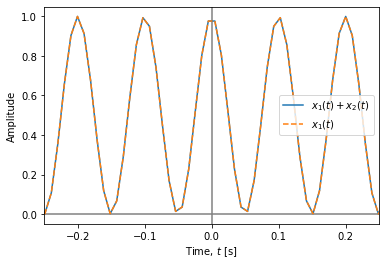

In [2]:
# Create time axis
t = np.linspace(-10,10,2048)   

# Define constant
A = 0.5 #amplitude
T = 10
fc = 10
x = 2

# Define rect pulse
rect_t = A*rect(2*t,T)
x1_t = rect_t

# Define the RF Pulse
cos_t = np.cos(2.0*np.pi*fc*t)
x2_t = rect_t * cos_t

# Define the double exponential function
#x_t = np.piecewise(t,[(t<0),(t==0),(t>0)],[lambda t:np.exp(a*t),lambda t: 1, lambda t:np.exp(-a*t)])
x_t = x1_t + x2_t

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
#plt.plot(t,x1_t,label='$x_{1}(t)$')
#plt.plot(t,x2_t,label='$x_{2}(t)$')
plt.plot(t,x1_t+x2_t,label='$x_{1}(t)+x_{2}(t)$')
plt.plot(t,x_t,label='$x_{1}(t)$',linestyle='--')
plt.legend()
plt.xlim(-.25,.25)
plt.xlabel('Time, $t$ [s]')
plt.ylabel('Amplitude')
#plt.savefig('Plots/4_Double_Exponential_Pulse.png')
plt.show()

### Periodic rectangular pulse train

Consider a rectangular pulse train. 
$$
g(t) = \begin{cases}
& A,\ & |t|<\tau/2\\
& 0,\ & |t|>\tau/2
\end{cases}
$$
within $\dfrac{-T_{0}}{2}<t<\dfrac{T_{0}}{2}$.

Assume the amplitude is $A=1$, the duty cycle is $\tau=0.2\,\mathrm{s}$ and the time period is $T_{0}=1\,\mathrm{s}$.

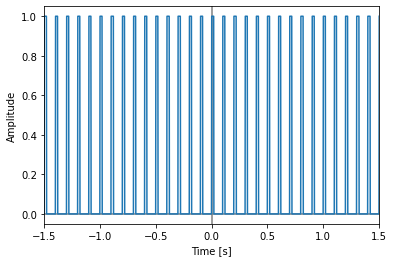

In [3]:
from scipy import signal as sig

t = np.linspace(-2,2,2048)   # Create time axis
tau = 0.2                    # Define duty cycle (pulse width)
T0 = 0.1                     # Define time period

# Define the rectangular pulse train
g_t = 0.5*(1+sig.square(2*np.pi*(1/T0)*(t+tau/2),duty=tau))

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,g_t)
plt.xlim([-1.5,1.5])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

Its Fourier Fourier coefficients can be calculated as
$$
\begin{align*}
G_{n} &= \dfrac{1}{T_{0}}\int_{-\infty}^{\infty}g(t) e^{-j2\pi (nf_{0})t} dt\\
&= \dfrac{1}{T_{0}}\int_{-\tau/2}^{\tau/2}A e^{-j2\pi (nf_{0})t} dt\\
G_{n} &= \dfrac{A\tau}{T_{0}}\mathrm{sinc}(nf_{0}\tau)
\end{align*}
$$

Its Fourier transform is given as
$$
\begin{align*}
G(f) &= \sum_{n=-\infty}^{\infty}G_{n}\delta(f-nf_{0})\\
&= \dfrac{A\tau}{T_{0}} \sum_{n=-\infty}^{\infty} \mathrm{sinc}(nf_{0}\tau)\delta(f-nf_{0})
\end{align*}
$$
This can be expressed as
$$
\begin{align*}
|G(f)| &= \dfrac{A\tau}{T_{0}} |\mathrm{sinc}(nf_{0}\tau)|,\ n=0,\pm 1, \pm2,...\\
\angle{G(f)} &= \begin{cases}
& 0,&\ \mathrm{sinc}(nf_{0}\tau)>0\\
& +\pi,&\ nf_{0}>0\ \mathrm{and}\ \mathrm{sinc}(nf_{0}\tau)<0\\
& -\pi,&\ nf_{0}<0\ \mathrm{and}\ \mathrm{sinc}(nf_{0}\tau)<0\\
\end{cases}
\end{align*}
$$ 

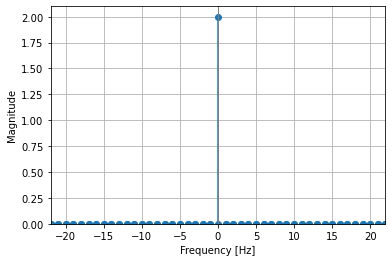

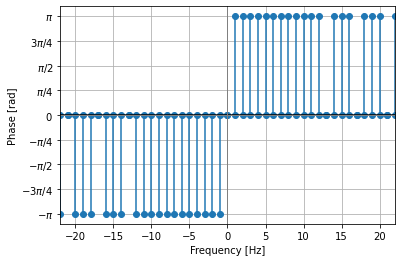

In [4]:
n = np.arange(0,50)     # Create an integer multiple array
f = n                   # Set frequency equal to n
A = 1.0                 # Specify amplitude
f0 = 1/T0               # Specify fundamental frequency

# Define the Fourier coefficients
Gn = A*tau*f0*np.sinc(n*f0*tau)

# Plot the line spectrum
Fourier_Coeff_plot(f,Gn,mode='mag')
plt.xlim([-22,22]);
#plt.savefig('Plots/3_Pulse_Train_Mag.png')
plt.show()

Fourier_Coeff_plot(f,Gn,mode='phase')
plt.xlim([-22,22]);
#plt.savefig('Plots/3_Pulse_Train_Phase.png')
plt.show()

### Time shifting

Consider a rectangular pulse train shifted in time such that, 
$$
r(t) = \begin{cases}
& A,\ & 0<t<\tau\\
& 0,\ & t>\tau
\end{cases}
$$
within $0<t<T_{0}$.

Assume the amplitude is $A=1$, the duty cycle is $\tau=0.2\,\mathrm{s}$, and the time period is $T_{0}=1\,\mathrm{s}$.

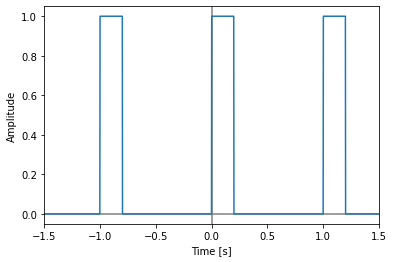

In [5]:
from scipy import signal as sig

t = np.linspace(-2,2,2048)   # Create time axis
tau = 0.2                    # Define duty cycle (pulse width)
T0 = 1.0                     # Define time period

# Define the rectangular pulse train
r_t = 0.5*(1+sig.square(2*np.pi*(1/T0)*(t),duty=tau))

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,r_t)
plt.xlim([-1.5,1.5])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
#plt.savefig('Plots/4_Time_Shifted_Pulse_Train.png')
plt.show()

Fourier coefficients can be calculated as
$$
\begin{align*}
R_{n} &= \dfrac{1}{T_{0}}\int_{-\infty}^{\infty}r(t) e^{-j2\pi (nf_{0})t} dt\\
&= \dfrac{1}{T_{0}}\int_{0}^{\tau}A e^{-j2\pi (nf_{0})t} dt\\
&= \dfrac{A}{T_{0}}\left[\dfrac{e^{-j2\pi (nf_{0})t}}{-2j\pi (nf_{0})}\right]_{0}^{\tau}\\
&= \dfrac{A}{T_{0}}\left[\dfrac{e^{-j2\pi (nf_{0})\tau}-1}{-2j\pi (nf_{0})} \right]\\
&= \dfrac{A}{T_{0}}\left[\dfrac{1-e^{-j2\pi (nf_{0})\tau}}{2j\pi (nf_{0})} \right]\\
&= \dfrac{A}{T_{0}}\dfrac{1}{\pi (nf_{0})}\left[\dfrac{e^{j\pi (nf_{0})\tau}e^{-j\pi (nf_{0})\tau}-e^{-j2\pi (nf_{0})\tau}}{2j}\right]\\
&= \dfrac{A}{T_{0}}\dfrac{e^{-j\pi (nf_{0})\tau}}{\pi (nf_{0})}\left[\dfrac{e^{j\pi (nf_{0})\tau}-e^{-j\pi (nf_{0})\tau}}{2j}\right]\\
&= \dfrac{A}{T_{0}}\dfrac{\sin(\pi (nf_{0})\tau)}{\pi (nf_{0})}e^{-j\pi (nf_{0})\tau}\\
&= \dfrac{A\tau}{T_{0}}\dfrac{\sin(\pi (nf_{0})\tau)}{\pi (nf_{0})\tau}e^{-j\pi (nf_{0})\tau}\\
R_{n}&= \dfrac{A\tau}{T_{0}}\mathrm{sinc}(nf_{0}\tau) e^{-j\pi (nf_{0})\tau}
\end{align*}
$$

Fourier transform is given as
$$
\begin{align*}
R(f) &= \sum_{n=-\infty}^{\infty}R_{n}\delta(f-nf_{0})\\
&= \dfrac{A\tau}{T_{0}} \sum_{n=-\infty}^{\infty} \mathrm{sinc}(nf_{0}\tau)e^{-j\pi (nf_{0})\tau}\delta(f-nf_{0})
\end{align*}
$$
This can be expressed as
$$
\begin{align*}
|R(f)| &= \dfrac{A\tau}{T_{0}} |\mathrm{sinc}(nf_{0}\tau)|,\ n=0,\pm 1, \pm2,...\\
\angle{R(f)} &= \begin{cases}
&  -\pi (nf_{0})\tau,&\ \mathrm{sinc}(nf_{0}\tau)>0\\
& -\pi (nf_{0})\tau+\pi,&\ nf_{0}>0\ \mathrm{and}\ \mathrm{sinc}(nf_{0}\tau)<0\\
& -\pi (nf_{0})\tau-\pi,&\ nf_{0}<0\ \mathrm{and}\ \mathrm{sinc}(nf_{0}\tau)<0\\
\end{cases}
\end{align*}
$$

The Fourier transform of the shifted pulse train can be calculated in terms of the Fourier transform of the original pulse train as follows:
$$
R(f) = F[g(t-t_{0})] = \int_{-\infty}^{\infty} g(t-t_{0})\,e^{-j2\pi ft}\,dt
$$
where $t_{0}$ is the amount of time by which the original signal is shifted. In this example, $t_{0}=\tau/2$.
$$
\begin{align*}
R(f) &= \int_{-\infty}^{\infty} g(t-t_{0})\,e^{-j2\pi ft}\,dt\\
&= \int_{-\infty}^{\infty} g(t-t_{0})\,e^{-j2\pi ft}\,e^{j2\pi ft_{0}}\,e^{-j2\pi ft_{0}}\,dt\\
&= e^{-j2\pi ft_{0}}\int_{-\infty}^{\infty} g(t-t_{0})\,e^{-j2\pi f(t-t_{0})}\,dt
\end{align*}
$$
Set $\lambda = t-t_{0}$, then $d\lambda=dt$.
$$
\begin{align*}
R(f) &= e^{-j2\pi ft_{0}}\int_{-\infty}^{\infty} g(\lambda)\,e^{-j2\pi f\lambda}\,d\lambda\\
&= e^{-j2\pi ft_{0}}\,G(f)\\
\end{align*}
$$
Replace $t_{0}=\tau/2$ and $f=nf_{0}$,
$$
R(f) = G(f)\,e^{-j\pi nf_{0}\tau}
$$

The magnitude of the Fourier transform of the shifted pulse train is same as the original pulse transform, i.e.
$$
|R(f)| = |G(f)|
$$

However, the phase of the Fourier transform of the shifted pulse train has a slope of $-\pi nf_{0}\tau$ added to the phase of the original pulse train, i.e.
$$
\angle{R(f)} = -\pi nf_{0}\tau + \angle{G(f)}
$$

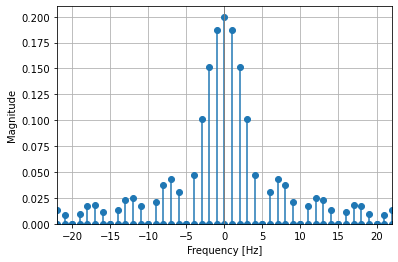

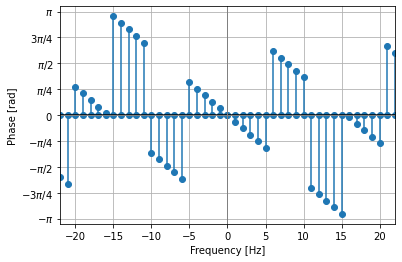

In [6]:
n = np.arange(0,50)     # Create an integer multiple array
f = n                   # Set frequency equal to n
A = 1.0                 # Specify amplitude
f0 = 1/T0               # Specify fundamental frequency

# Define the Fourier coefficients
Rn = A*tau*f0*np.sinc(n*f0*tau)*np.exp(-1j*n*f0*tau)

# Plot the line spectrum
Fourier_Coeff_plot(f,Rn,mode='mag')
plt.xlim([-22,22]);
#plt.savefig('Plots/4_Time_Shifted_Pulse_Train_Mag.png')
plt.show()

Fourier_Coeff_plot(f,Rn,mode='phase')
plt.xlim([-22,22]);
#plt.savefig('Plots/4_Time_Shifted_Pulse_Train_Phase.png')
plt.show()

### Aperiodic rectangular pulse
Consider a rectangular pulse of duration $T_{0}$, and amplitude $A$.
$$
\mathrm{rect}(t) = \begin{cases}
& A,&\ \mathrm{for}\ |t|<\dfrac{T_{0}}{2}\\
& 0,&\ \mathrm{otherwise}
\end{cases}
$$
Assume the amplitude is $A=1$, and the duration is $T_{0}=0.2\,\mathrm{s}$.

The Fourier transform of this *time-limited* rectangular pulse is calculated as
$$
\begin{align*}
\mathrm{Rect}(f) &= \int_{-\infty}^{\infty}\mathrm{rect}(t)e^{-j2\pi ft}dt\\
&= \int_{-T_{0}/2}^{T_{0}/2}A e^{-j2\pi ft}dt\\
\mathrm{Rect}(f) &= AT_{0}\mathrm{sinc}(fT_{0})
\end{align*}
$$ 

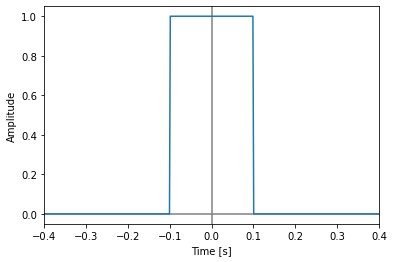

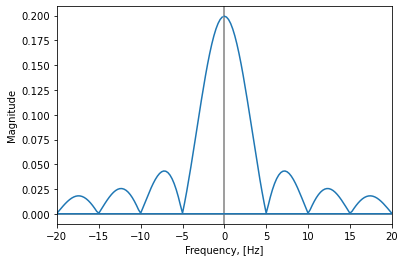

In [7]:
# Create time axis
t = np.linspace(-2,2,2048)      

# Define a rectangular pulse centered at t=0
A = 1.0          # Amplitude
T0 = 0.2         # pulse width
rect_t = A*rect(t,T0)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,rect_t)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim([-0.4,0.4])
plt.show()

# Create the frequency axis
N = len(t)         # length of the time axis
dt = t[1]-t[0]     # time step value
freq = np.fft.fftfreq(N,dt) 

# Calculate FFT. Refer to Note 2.2 above for the scaling.
Rect_f = (np.fft.fft(rect_t))*dt

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.abs(Rect_f))
plt.xlim([-20,20])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('Magnitude')
plt.show()

### Time scaling

This property is defined as
$$
g(\alpha t) \leftrightharpoons \dfrac{1}{\alpha}G\left(\dfrac{f}{\alpha}\right)
$$

For a rectangular pulse of duration $T_{0}$, and amplitude $A$, assume it is time-scaled by a factor of $\alpha$.
$$
s(t) = \mathrm{rect}(\alpha t) = \begin{cases}
& A,&\ \mathrm{for}\ |t|<\dfrac{T_{0}}{2}\dfrac{1}{\alpha}\\
& 0,&\ \mathrm{otherwise}
\end{cases}
$$

The Fourier transform of this *time-scaled* rectangular pulse is calculated as
$$
\mathrm{S}(f) = \int_{-\infty}^{\infty}\mathrm{rect}(\alpha t)e^{-j2\pi ft}dt
$$
Let $\tau = \alpha t$. This implies, $t = \tau/\alpha$
$$
\begin{align*}
&= \int_{-T_{0}/2\alpha}^{T_{0}/2\alpha}A e^{-j2\pi (f/\alpha)\tau}\dfrac{d\tau}{\alpha}\\
&= \dfrac{A}{\alpha}\left[\dfrac{e^{-j2\pi (f/\alpha)\tau}}{-j2\pi (f/\alpha)}\right]_{-T_{0}/2\alpha}^{T_{0}/2\alpha}\\
&= \dfrac{A}{\pi f}\left[\dfrac{e^{-j\pi (f/\alpha)T_{0}}-e^{j\pi (f/\alpha)T_{0}}}{-2j}\right]\\
&= \dfrac{A}{\pi f}\left[\dfrac{e^{j\pi (f/\alpha)T_{0}}-e^{-j\pi (f/\alpha)T_{0}}}{2j}\right]\\
&= A\dfrac{\sin(\pi (f/\alpha)T_{0})}{\pi f}\\
&= \dfrac{AT_{0}}{\alpha}\dfrac{\sin(\pi (f/\alpha)T_{0})}{\pi (f/\alpha)T_{0}}\\
\mathrm{S}(f) &= \dfrac{AT_{0}}{\alpha}\mathrm{sinc}(fT_{0}/\alpha)
\end{align*}
$$ 

#### Time compression
The signal is compressed in time if time-scaling factor, $\alpha>1$.

Assume $\alpha=2$, amplitude $A=1$, and duration $T_{0}=0.2\,\mathrm{s}$.

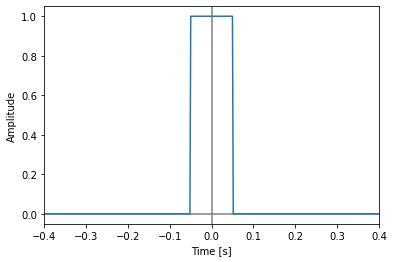

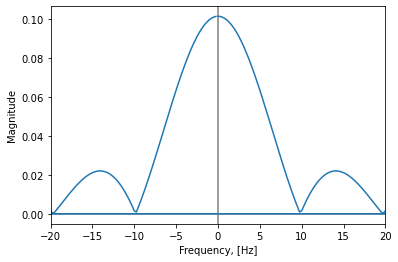

In [8]:
# Create time axis
t = np.linspace(-2,2,2048)      

# Define a rectangular pulse centered at t=0
A = 1.0         # Amplitude
T = 0.2         # pulse width
alpha = 2       # time scale factor
s_t = A*rect(alpha*t,T)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_t)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim([-0.4,0.4])
plt.show()

# Create the frequency axis
N = len(t)         # length of the time axis
dt = t[1]-t[0]     # time step value
freq = np.fft.fftfreq(N,dt) 

# Calculate FFT. Refer to Note 2.2 above for the scaling.
S_f = (np.fft.fft(s_t))*dt

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.abs(S_f))
plt.xlim([-20,20])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('Magnitude')
#plt.savefig('Plots/4_Rectangular_Pulse_Scaled_Mag.png')
plt.show()

#### Time expansion
The signal is expanded in time if time-scaling factor, $\alpha<1$.

Assume $\alpha=0.5$, amplitude $A=1$, and duration $T_{0}=0.2\,\mathrm{s}$.

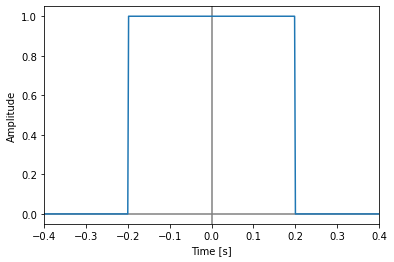

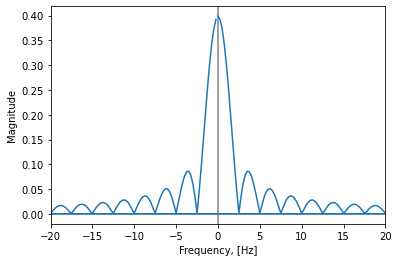

In [9]:
# Create time axis
t = np.linspace(-2,2,2048)      

# Define a rectangular pulse centered at t=0
A = 1.0         # Amplitude
T = 0.2         # pulse width
alpha = 0.5     # time scale factor
s_t = A*rect(alpha*t,T)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_t)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim([-0.4,0.4])
plt.show()

# Create the frequency axis
N = len(t)         # length of the time axis
dt = t[1]-t[0]     # time step value
freq = np.fft.fftfreq(N,dt) 

# Calculate FFT. Refer to Note 2.2 above for the scaling.
S_f = (np.fft.fft(s_t))*dt

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.abs(S_f))
plt.xlim([-20,20])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('Magnitude')
#plt.savefig('Plots/4_Rectangular_Pulse_Scaled_Mag.png')
plt.show()

### Frequency translation (frequency shifting)
This property is defined as
$$
g(t)\exp\left(j2\pi f_{c}t\right) \leftrightharpoons G(f-f_{c})
$$
It is also called modulation theorem when $g(t)$ is multiplied by a sinusoid with a characteristic frequency.

Consider a rectangular pulse of duration $T_{0}$, and amplitude $A$.
$$
\mathrm{rect}(t) = \begin{cases}
& A,&\ \mathrm{for}\ |t|<\dfrac{T_{0}}{2}\\
& 0,&\ \mathrm{otherwise}
\end{cases}
$$ 

If this pulse is multiplied by a cosine function having characteristic frequency, $f_{c}$, then the resulting RF pulse will be defined as
$$
\begin{align*}
rf(t) &= \mathrm{rect}(t)\cos(2\pi f_{c}t)\\
rf(t) &= \begin{cases}
& A\cos(2\pi f_{c}t), & \dfrac{-T_{0}}{2}<t<\dfrac{T_{0}}{2}\\
& 0, & |t|\geq \dfrac{T_{0}}{2}
\end{cases}
\end{align*}
$$

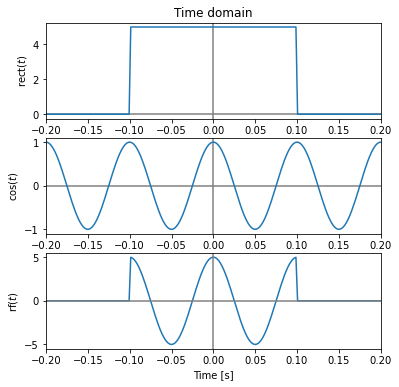

In [10]:
# Create time axis
t = np.linspace(-2,2,2048)      

# Define a rectangular pulse centered at t=0
A = 5         # Amplitude
T = 0.1
x = 0.5         # pulse width
rect_t = A*rect(x*t,T)

# Define a cosine signal
fc = 10         # characteristic frequency
cos_t = np.cos(2*np.pi*fc*t)
#cos_t = np.cos(4*np.pi*fc*t)

# Form the RF pulse
rf_t = rect_t*cos_t
#rf1_t = rect_t
#rf2_t = rect_t*cos_t
#rf_t = rf1_t + rf2_t

# Plot the signal
plt.figure(figsize=(6,6))

plt.subplot(311)
plt.title('Time domain')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,rect_t)
plt.ylabel('$\mathrm{rect}(t)$')
plt.xlim(-0.2,0.2)

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,cos_t)
plt.ylabel('$\cos(t)$')
plt.xlim(-0.2,0.2)

plt.subplot(313)
plt.plot(t,rf_t)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.ylabel('$\mathrm{rf}(t)$')
plt.xlim(-0.2,0.2)
plt.xlabel('Time [s]')
#plt.savefig('Plots/4_Modulation_Time_Domain.png')
plt.show()

#### Fourier transform of the RF pulse
Since the cosine term can be expanded using Fourier series as follows,
$$
\cos(2\pi f_{c}t) = \dfrac{1}{2}\,e^{j2\pi f_{c}t}+\dfrac{1}{2}\,e^{-j2\pi f_{c}t}
$$

The Fourier transform for the RF pulse can be expressed as
$$
\begin{align*}
RF(f) &= \int_{-\infty}^{\infty} rf(t)\, e^{-j2\pi ft}\,dt\\
&= \int_{-T_{0}/2}^{T_{0}/2} A\ \left[\dfrac{1}{2}e^{j2\pi f_{c}t}+\dfrac{1}{2}e^{-j2\pi f_{c}t}\right]\ e^{-j2\pi ft}\,dt\\
&= \dfrac{A}{2}\int_{-T_{0}/2}^{T_{0}/2} \left(e^{-j2\pi [f-f_{c}]t}+e^{-j2\pi [f+f_{c}]t}\right)dt\\
&= \dfrac{AT_{0}}{2}\left[\mathrm{sinc}(T_{0}[f-f_{c}])+\mathrm{sinc}(T_{0}[f+f_{c}])\right]
\end{align*}
$$

Therefore, the frequency spectrum will be centered at $f=f_{c}$ instead of $f=0$.

**Important observation**: *Multiplying a time domain signal with a sinusiod of characteristic frequency, $f_{c}$, shifts its frequency spectrum to $f_{c}$.*

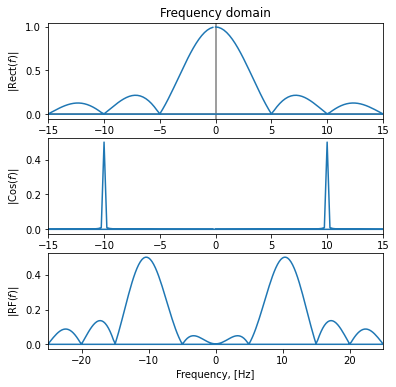

In [11]:
# Create the frequency axis
N = len(t)         # length of the time axis
dt = t[1]-t[0]     # time step value
freq = np.fft.fftfreq(N,dt) 

# Calculate FFT. Refer to Note 2.2 above for the scaling.
Rect_f = (np.fft.fft(rect_t))*dt
RF_f = (np.fft.fft(rf_t))*dt
#RF1_f = (np.fft.fft(rf1_t))*dt
#RF2_f = (np.fft.fft(rf2_t))*dt

# Calculate FFT. Refer to Note 2.1 above for the scaling.
Cos_f = (np.fft.fft(cos_t))/N

# Plot the magnitude spectrum
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.title('Frequency domain')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.abs(Rect_f))
plt.xlim(-15,15)
plt.ylabel('$|\mathrm{Rect}(f)|$')

plt.subplot(312)
plt.axvline(color='white')
plt.axhline(color='white')
plt.plot(freq,np.abs(Cos_f))
plt.xlim(-15,15)
plt.ylabel('$|\mathrm{Cos}(f)|$')

plt.subplot(313)

plt.axvline(color='white')
plt.axhline(color='white')
plt.plot(freq,np.abs(RF_f))
#plt.plot(freq,np.abs(RF1_f),linestyle='--')
#plt.plot(freq,np.abs(RF2_f),linestyle='--')
plt.xlim(-25,25)
plt.ylabel('$|\mathrm{RF}(f)|$')

plt.xlabel('Frequency, [Hz]')
#plt.savefig('Plots/4_Modulation_Frequency_Domain.png')
plt.show()

### Rayleigh's energy theorem
A time domain signal, $g(t)$, is defined as an energy signal if
$$
E_{total} = \int_{-\infty}^{\infty} |g(t)|^{2} dt < \infty
$$

then Rayleigh's energy theorem states that
$$
E_{total} = \int_{-\infty}^{\infty} |g(t)|^{2} dt = \int_{-\infty}^{\infty}|G(f)|^{2} df < \infty
$$
where $|G(f)|^{2}$ is defined as the energy spectral density, and is the measure of density of energy contained in $g(t)$ in Joules per Hertz.

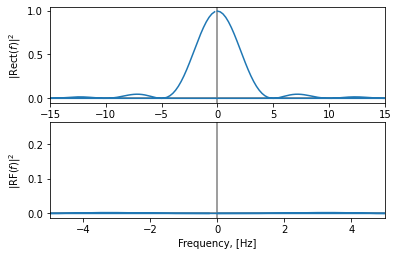

In [12]:
# Calculate energy spectral density
E_rect = (np.abs(Rect_f))**2    # for rectangular pulse
E_rf = (np.abs(RF_f))**2        # for rf pulse


# Plot the energy spectral sensity
plt.figure(figsize=(6,6))
plt.subplot(311)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,E_rect)
plt.xlim(-15,15)
plt.ylabel('$|\mathrm{Rect}(f)|^{2}$')

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,E_rf)
plt.xlim(-5,5)

plt.ylabel('$|\mathrm{RF}(f)|^{2}$')

plt.xlabel('Frequency, [Hz]')
plt.show()

### Parseval's power theorem

For a periodic time domain signal, $x(t)$, with period $T$, if the power is defined as
$$
P_{x} = \dfrac{1}{T}\int_{0}^{T} |x(t)|^{2} dt <\infty
$$

then Parseval's theorem states that the power can be expressed as a sum of the magnitude of its Fourier coefficients i.e.
$$
P_{x} = \sum_{n=-\infty}^{\infty} |X_{n}|^{2} = |X_{0}|^{2} + 2\sum_{n=1}^{\infty} |X_{n}|^{2}
$$

#### Example
Consider the signal,
$$
\begin{align*}
x(t) &= \cos(2\pi 5t) + \sin^{2}(2\pi 10t)\\
&= \cos(2\pi 5t) + \dfrac{1}{2}-\dfrac{1}{2}\cos(2\pi 20t)
\end{align*}
$$

The Fourier series expansion of this periodic signal is
$$
\begin{align*}
x(t) &= \dfrac{1}{2}e^{j(2\pi 5t)} + \dfrac{1}{2}e^{-j(2\pi 5t)}\\
&+ \dfrac{1}{2} -\dfrac{1}{2}\dfrac{1}{2}e^{j(2\pi 20t)} - \dfrac{1}{2}\dfrac{1}{2}e^{-j(2\pi 20t)}
\end{align*}
$$
The fundamental frequency is $f_{0}=5\,\mathrm{Hz}$. (L.C.M. of the time periods or G.C.D. of the frequencies present in the original signal.)

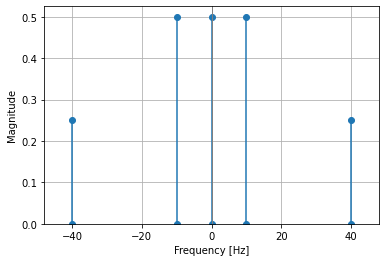

In [13]:
n = np.arange(0,50)     # Create an integer multiple array
f = n                   # Set frequency equal to n
f0 = 10                # Specify fundamental frequency

# Create a zero-filled array to store Fourier coefficients
# Fourier coefficients are complex numbers, so array type
# should be specified as "complex"
Xn = np.zeros(len(f),dtype=complex)

# Specify the non-zero Fourier coefficient values
# for integer multiples of f0
# Array indices must be integers
Xn[0] = 0.5
Xn[int(1*f0)] = 0.5*np.exp(1j*0)    
Xn[int(4*f0)] = 0.25*np.exp(1j*np.pi)

# Plot the line spectrum
Fourier_Coeff_plot(f,Xn,mode='mag')
plt.show()

The Fourier coefficients for this signal expressed as complex weights are
$$
X_{n} = \begin{cases}
& 0.5,&\ n=0\\
& 0.5\,e^{j0},&\ n=\pm 1\\
& 0.25\,e^{\pm j180^{\circ}},&\ n=\pm 4\\
& 0,&\ \mathrm{all\ other\ }n
\end{cases}
$$
The average power of the signal can be calculated using Parseval's theorem as follows:
$$
\begin{align*}
P_{x} &= \sum_{n=-\infty}^{\infty} |X_{n}|^{2}\\
&= |X_{0}|^{2} + 2\sum_{n=1}^{\infty} |X_{n}|^{2}\\
&= (0.5)^{2} + 2\left[(0.5)^{2}+(0.25)^{2}\right]\\
P_{x} &= 0.875
\end{align*}
$$